# Plotting and Visualization

### Objectives:
- Figures and Subplots
- Adjusting the spacing around subplots
- Colors, Markers, and Line Styles
- Ticks, Labels, and Legends


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
# read the tips.csv file
data = pd.read_csv("tips.csv")
data

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


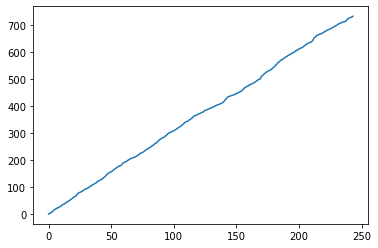

In [89]:
# draw a line chart of the tip column's comulative sum
plt.plot(data["tip"].cumsum())

<BarContainer object of 4 artists>

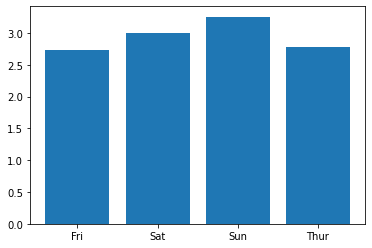

In [90]:
# group the tips by day and draw a bar chart showing tips of each day
temp = data.groupby("day")["tip"].mean()
plt.bar(temp.index, temp.values)

<BarContainer object of 4 artists>

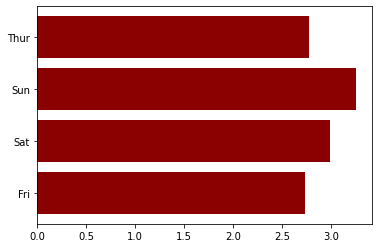

In [91]:
# with the same groups draw a horizontal bar chart, try to change height and color
plt.barh(temp.index, temp.values, height=0.8, color="darkred")

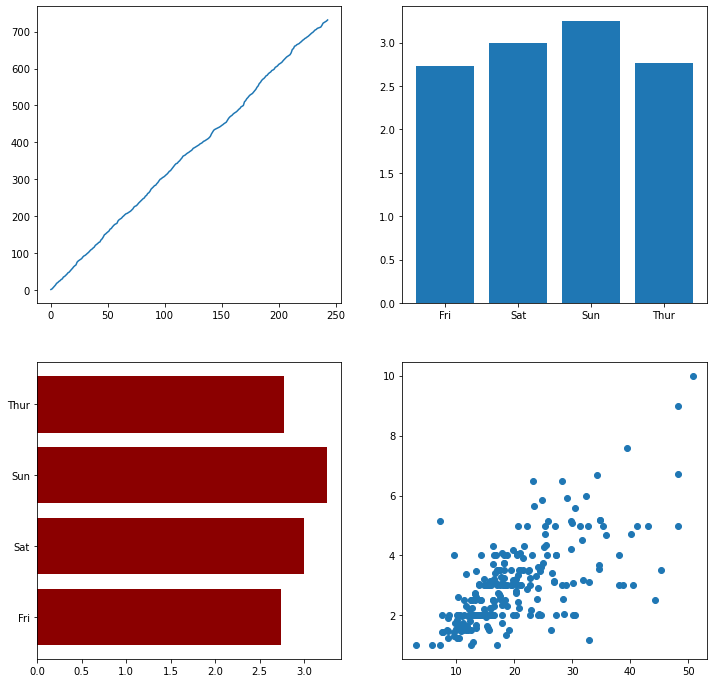

In [92]:
# create 2 * 2 subplot then add the earlier charts to each in a subplot

fig = plt.figure(figsize=(12, 12))

fig.add_subplot(2, 2, 1)
plt.plot(data["tip"].cumsum())

fig.add_subplot(2, 2, 2)
plt.bar(temp.index, temp.values)

fig.add_subplot(2, 2, 3)
plt.barh(temp.index, temp.values, height=0.8, color="darkred")

fig.add_subplot(2, 2, 4)
plt.scatter(data["total_bill"], data["tip"])



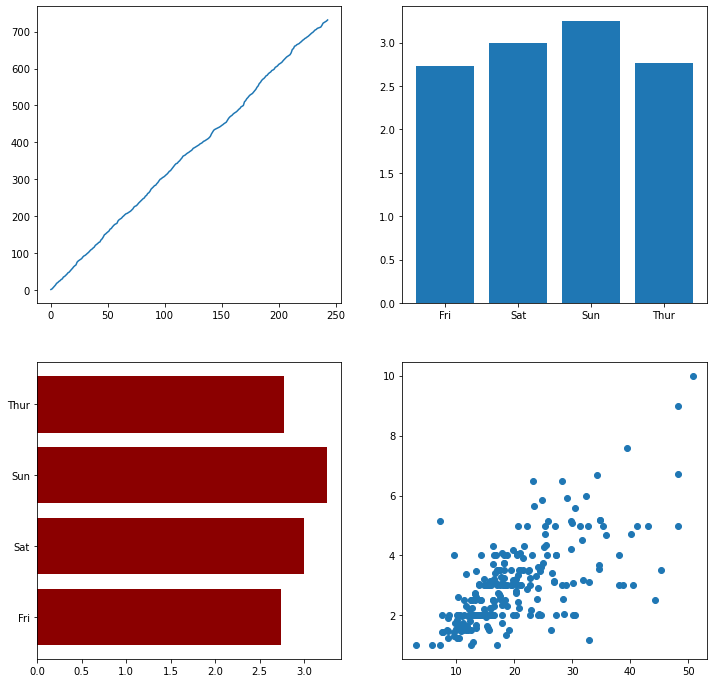

In [93]:
# do the same, using the axises
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(data["tip"].cumsum())
ax2.bar(temp.index, temp.values)
ax3.barh(temp.index, temp.values, height=0.8, color="darkred")
ax4.scatter(data["total_bill"], data["tip"])




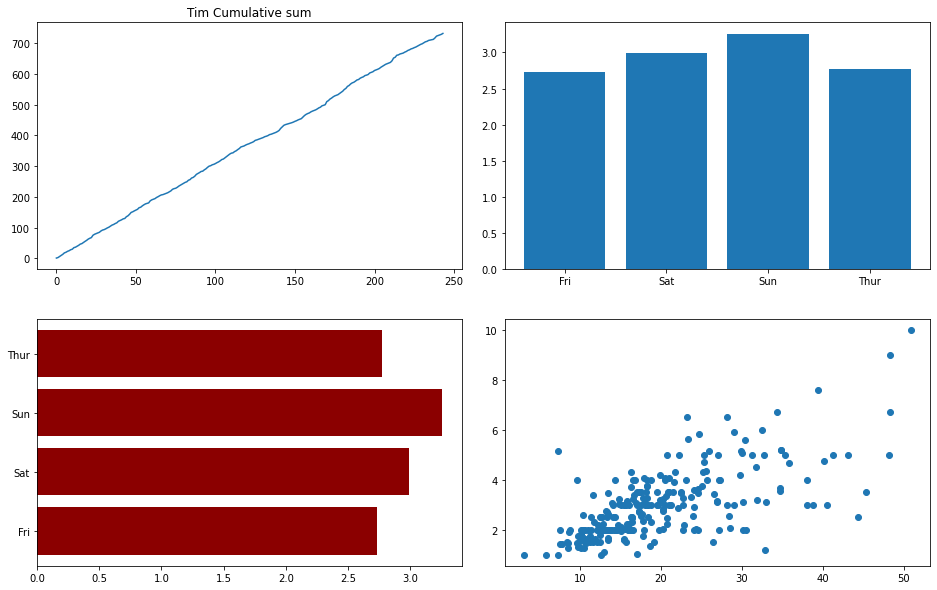

In [94]:
# do the same, but add all subplots at once, then customize line type, title and spaces

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0][0].plot(data["tip"].cumsum())
axes[0][0].set_title("Tim Cumulative sum")

axes[0][1].bar(temp.index, temp.values)
axes[1][0].barh(temp.index, temp.values, height=0.8, color="darkred")
axes[1][1].scatter(data["total_bill"], data["tip"])

fig.subplots_adjust(wspace=0.1)

# Analyze USA.gov Data from Bitly

In [95]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# read data from 'bitly_usagov.txt' file
data = pd.read_json("bitly_usagov.txt", lines=True)
data.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


## Chart 1
- How many login from each time zone ?

In [114]:
# check if null values exist in 'tz' column
data["tz"].isnull().sum()

120

In [115]:
# check if values of empty string exist in 'tz' column
mask = data["tz"] == ""
mask.sum()

521

In [117]:
# replace nulls and empty strings with 'Unknown' in 'tz' column
data["tz"].replace([np.nan, ""], "Unknown", inplace=True)


In [118]:
# Test
data["tz"].isnull().sum()

0

In [119]:
mask = data["tz"] == ""
mask.sum()

0

In [126]:
# count the occurances of each value in 'tz' column
# data.groupby("tz").size().sort_values(ascending=False).head(7)
tz_data = data["tz"].value_counts().head(7)
tz_data

America/New_York       1251
Unknown                 641
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Name: tz, dtype: int64

![](timezone_freq.png)

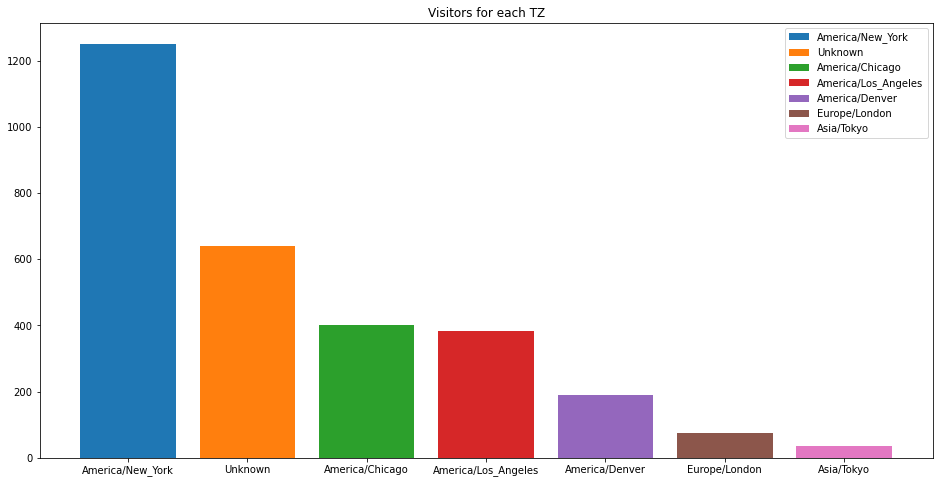

In [130]:
# display a simmilar chart using matplotlib

fig = plt.figure(figsize=(16, 8))
for i in range(tz_data.size):
    plt.bar(tz_data.index[i], tz_data.values[i], label=tz_data.index[i])

plt.title("Visitors for each TZ")
plt.legend()

![](timezone_freq_h.png)

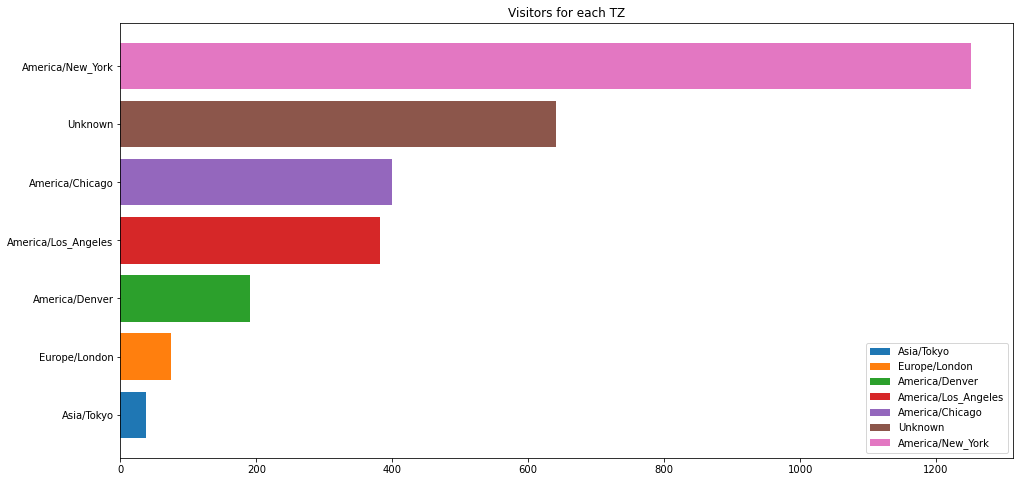

In [133]:
# display a simmilar chart using matplotlib
fig = plt.figure(figsize=(16, 8))
tz_data = tz_data.sort_values()

for i in range(tz_data.size):
    plt.barh(tz_data.index[i], tz_data.values[i], label=tz_data.index[i])

plt.title("Visitors for each TZ")
plt.legend()

![](timezone_freq_sns.png)

<AxesSubplot:>

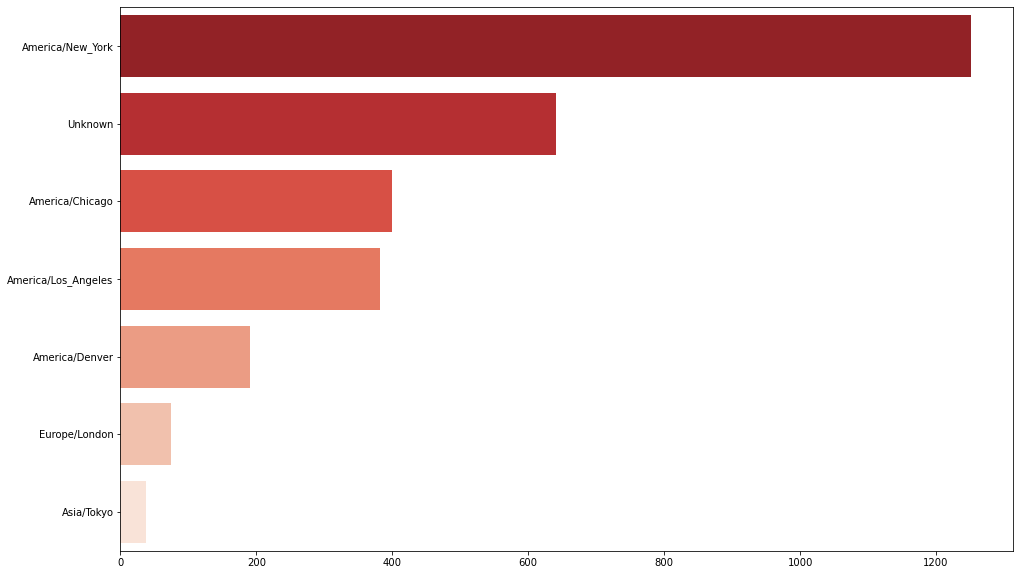

In [139]:
# display a simmilar chart using seaborn
plt.figure(figsize=(16, 10))
tz_data = tz_data.sort_values(ascending=False)

sns.barplot(y=tz_data.index, x=tz_data.values, palette="Reds_r")

## Chart 2
- what's the most used OS in each time zone show the top ten?

In [140]:
# check if null values exist in 'a' column
data["a"].isnull().sum()


120

In [141]:
# check if values of empty string exist in 'a' column
mask = data["a"] == ""
mask.sum()


0

In [143]:
# drop rows with nulls or empty strings in 'a' column
data.dropna(subset=["a"], inplace=True)
data["a"].isnull().sum()


0

In [145]:
# create a new column 'OS', which has the value of 'Windows' 
# if the word 'windows' exist in the 'a' column and 'Other' otherwise
data["OS"] = data["a"].map(lambda a: "Windows" if "windows" in a.lower() else "Other")
data

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,OS
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Other
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Other
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN,Windows
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN,Windows
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Other
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN,Other


In [157]:
# show the number of observations for each time zone and OS
temp = data.groupby(["tz", "OS"]).size().unstack().fillna(0)


In [158]:
# sort the time zones descending by total observations then get the top ten
temp["total"] = temp["Other"] + temp["Windows"]
temp = temp.sort_values("total", ascending=False).head(10)
temp

OS,Other,Windows,total
tz,,,
America/New_York,339.0,912.0,1251.0
Unknown,245.0,276.0,521.0
America/Chicago,115.0,285.0,400.0
America/Los_Angeles,130.0,252.0,382.0
America/Denver,132.0,59.0,191.0
Europe/London,43.0,31.0,74.0
Asia/Tokyo,2.0,35.0,37.0
Pacific/Honolulu,0.0,36.0,36.0
Europe/Madrid,16.0,19.0,35.0


In [163]:
temp = temp.drop(columns="total").stack().reset_index().rename(columns={0: "visitors"})
temp

,tz,OS,visitors
0,America/New_York,Other,339.0
1,America/New_York,Windows,912.0
2,Unknown,Other,245.0
3,Unknown,Windows,276.0
4,America/Chicago,Other,115.0
5,America/Chicago,Windows,285.0
6,America/Los_Angeles,Other,130.0
7,America/Los_Angeles,Windows,252.0
8,America/Denver,Other,132.0
9,America/Denver,Windows,59.0


![](timezone_os_freq.png)

<AxesSubplot:xlabel='visitors', ylabel='tz'>

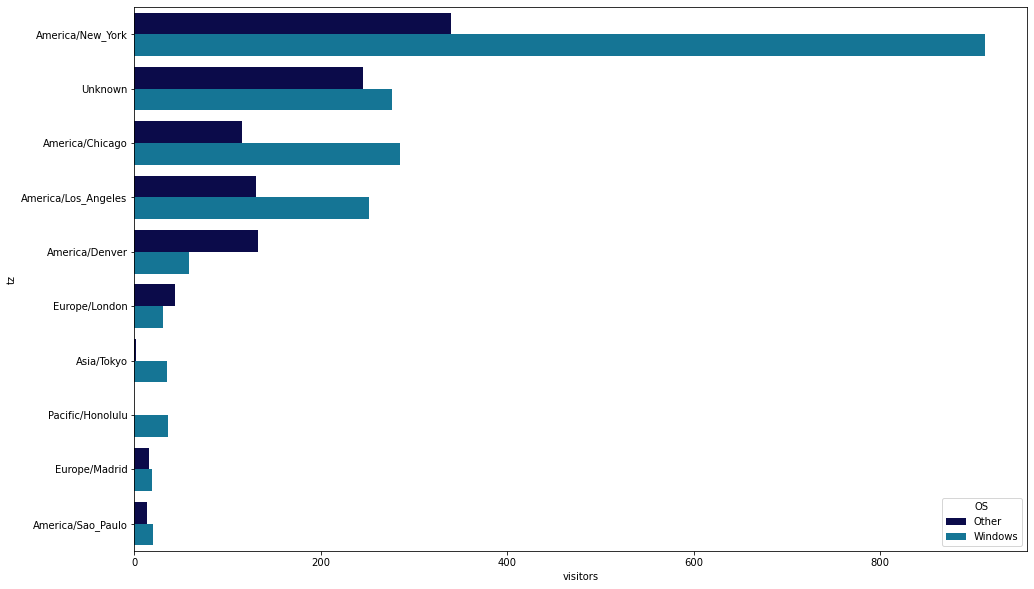

In [166]:
# display a simmilar chart using seaborn
plt.figure(figsize=(16, 10))
sns.barplot(y=temp["tz"], x=temp["visitors"], hue=temp["OS"], palette="ocean")

## Chart 3
- What's the percentage of OS in each time zone ?

In [171]:
# calculate the percentage of OS in the time zone

def calc_pct(group):
    group["pct"] = np.round(group["visitors"] / group["visitors"].sum() * 100, 2)
    return group

temp = temp.groupby("tz").apply(calc_pct)
temp

,tz,OS,visitors,pct
0,America/New_York,Other,339.0,27.10
1,America/New_York,Windows,912.0,72.90
2,Unknown,Other,245.0,47.02
3,Unknown,Windows,276.0,52.98
4,America/Chicago,Other,115.0,28.75
5,America/Chicago,Windows,285.0,71.25
6,America/Los_Angeles,Other,130.0,34.03
7,America/Los_Angeles,Windows,252.0,65.97
8,America/Denver,Other,132.0,69.11
9,America/Denver,Windows,59.0,30.89


![](timezone_os_freq_normed.png)

<AxesSubplot:xlabel='pct', ylabel='tz'>

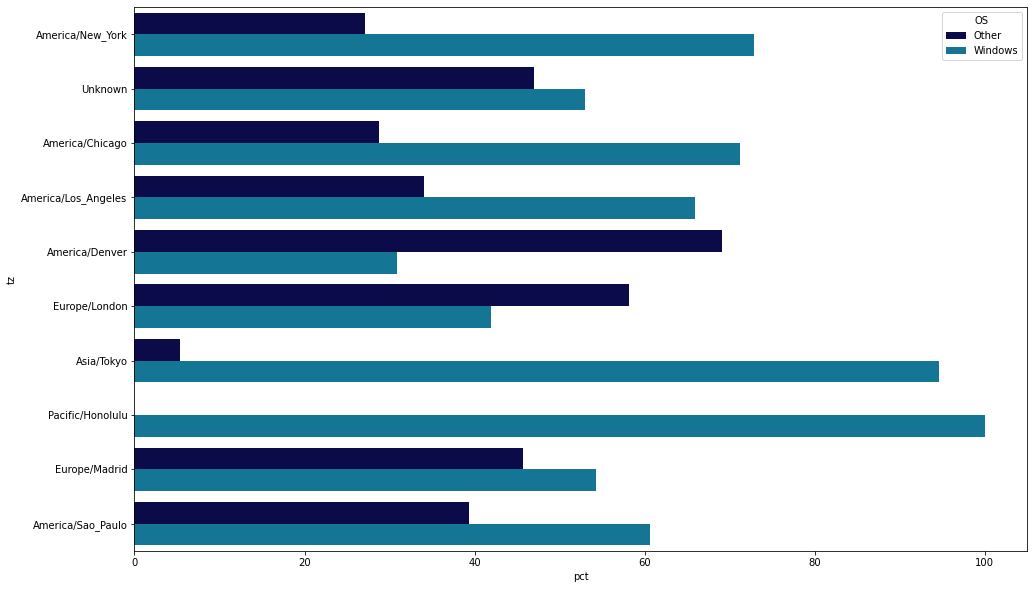

In [172]:
# display a simmilar chart using seaborn
plt.figure(figsize=(16, 10))
sns.barplot(y=temp["tz"], x=temp["pct"], hue=temp["OS"], palette="ocean")

## Independent Practice
- explore the data from 'tips.csv'
- state some questions and draw charts to answer them